# **Lista 7 - Visualização de dados**

#### **Fala devs, beleza?**
Bem vindos à ultima lista de exercícios do nosso curso! Aqui serão abordados assuntos envolvendo o tema de "Visualização de dados". <br><br>Usaremos um *dataset* de dados de uma certa clínica médica, em que cada observação corresponde a um paciente.

<h3> Importando os dados

Antes de iniciar o processo de visualização, é necessário que importemos os dados do arquivo .csv, bem como as bibliotecas que iremos utilizar:

In [1]:
### Importando as bibliotecas
# Caso precise instalar alguma biblioteca use: %pip install nome_da_biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
### Carregando o dataset
data = pd.read_csv("dataset_dev.csv")

Uma vez importados, podemos buscar entender a estrutura dos dados e a forma como foram organizados, por meio da exploração dos mesmos:

In [4]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  country  previous_cancellations  booking_changes  days_in_waiting_list  \
0     PRT                       0                3                     0   
1     PRT                       0                4                     0   
2     GBR                       0                0                     0   
3     GBR                       0                0                     0   
4     GBR                       0                0                     0   

    adr  required_car_parking_spaces  total_of_special_requests  \
0   0.0                            0                          0   
1   0.0                            0                          0   
2  75.0                            0                          0   
3  75.0                            0                          0   
4  98.0                            0                          1   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        118898 non-null  object 
 1   is_canceled                  118898 non-null  int64  
 2   lead_time                    118898 non-null  int64  
 3   arrival_date_year            118898 non-null  int64  
 4   arrival_date_month           118898 non-null  object 
 5   arrival_date_week_number     118898 non-null  int64  
 6   arrival_date_day_of_month    118898 non-null  int64  
 7   stays_in_weekend_nights      118898 non-null  int64  
 8   stays_in_week_nights         118898 non-null  int64  
 9   adults                       118898 non-null  int64  
 10  children                     118898 non-null  float64
 11  babies                       118898 non-null  int64  
 12  country                      118898 non-null  object 
 13 

In [6]:
data.shape

(117762, 20)

Breve descrição das colunas: <br><br>

**hotel**: Tipo de hotel (Resort Hotel ou City Hotel).

**is_canceled**: Indica se a reserva foi cancelada (0 para não cancelada, 1 para cancelada).

**lead_time**: Número de dias entre a data da reserva e a data de chegada.

**arrival_date_year**: Ano da data de chegada.

**arrival_date_month**: Mês da data de chegada.

**arrival_date_week_number**: Número da semana do ano da data de chegada.

**arrival_date_day_of_month**: Dia do mês da data de chegada.

**stays_in_weekend_nights**: Número de noites de estadia durante os fins de semana.

**stays_in_week_nights**: Número de noites de estadia durante os dias de semana.

**adults**: Número de adultos.

**children**: Número de crianças.

**babies**: Número de bebês.

**country**: País de origem.

**previous_cancellations**: Número de reservas canceladas anteriormente pelo cliente.

**booking_changes**: Número de alterações feitas na reserva.

**days_in_waiting_list**: Número de dias na lista de espera antes da confirmação da reserva.

**adr**: Tarifa média diária (Average Daily Rate).

**required_car_parking_spaces**: Número de vagas de estacionamento necessárias.

**total_of_special_requests**: Número total de pedidos especiais feitos pelo cliente.

**reservation_status_date**: Data da última atualização do status da reserva.

A partir dessas informações, já podemos iniciar o processo de visualização de dados. E assim sendo, agora é com vocês!!

# Exercícios

<h2> Questão 1

#### Faça um gráfico que relacione a quantidade de dias de antecedência da reserva com a tarifa média diária:

In [23]:
### REMOÇÃO DOS OUTLIERS ###
%pip install scipy
from scipy import stats
z_scores = stats.zscore(data['adr'])
threshold = 3
data = data[(z_scores < threshold)]

<function matplotlib.pyplot.show(close=None, block=None)>

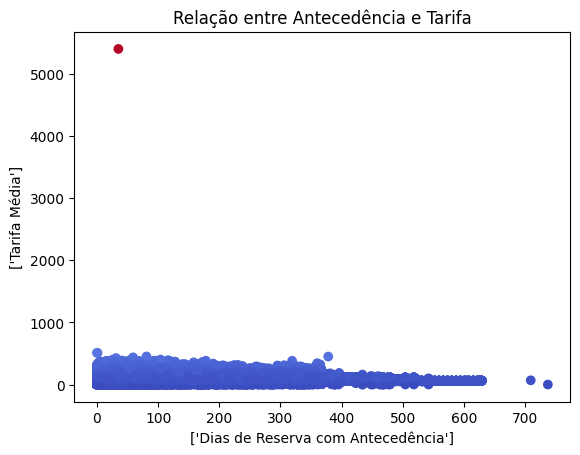

In [24]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.scatter(data['lead_time'],data['adr'],c=data['adr'],cmap='coolwarm')
plt.xlabel([ 'Dias de Reserva com Antecedência'])
plt.ylabel(['Tarifa Média'])
plt.title('Relação entre Antecedência e Tarifa')
plt.show

## Questão 2

#### a) Faça um gráfico para analisar a quantidade de hoteis de cada tipo na amostra

<function matplotlib.pyplot.show(close=None, block=None)>

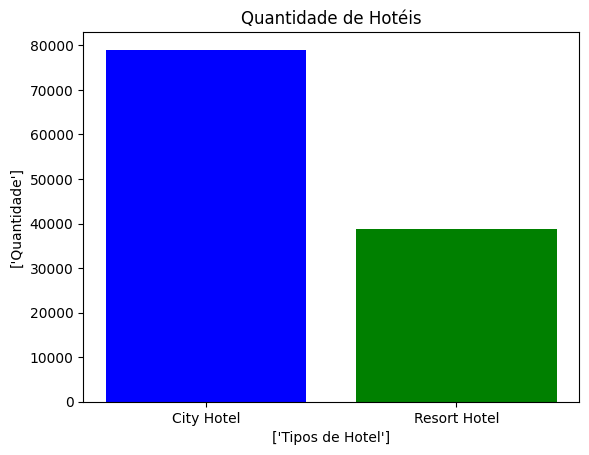

In [14]:
### SEU CÓDIGO COMEÇA AQUI ###
quantidade= data['hotel'].value_counts()
cores = ['blue', 'green', 'red', 'yellow']
plt.bar(quantidade.index,quantidade.values, color=cores)
plt.xlabel([ 'Tipos de Hotel'])
plt.ylabel(['Quantidade'])
plt.title('Quantidade de Hotéis')
plt.show

#### b) Agora, faça um gráfico para analisar a quantidade de reservas canceladas para cada tipo de hotel
dica: dê uma olhada na função ```.countplot()``` do *Seaborn*

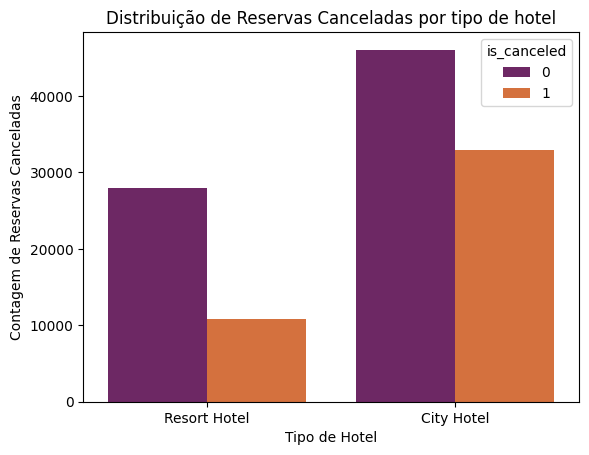

In [18]:
### SEU CÓDIGO COMEÇA AQUI ###
sns.countplot(x=data['hotel'],hue=data['is_canceled'],palette='inferno')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Contagem de Reservas Canceladas')
plt.title('Distribuição de Reservas Canceladas por tipo de hotel')
plt.show()

## Questão 3

### a) Faça um gráfico que demonstre a quantidade de noites de estadia durante os fins de semana, dividindo o gráfico em 20 intervalos distintos: <br> 
Dica: tente utilizar o parâmetro '*bins*' do matplotlib para selecionar a quantidade de grupos que deseja utilizar

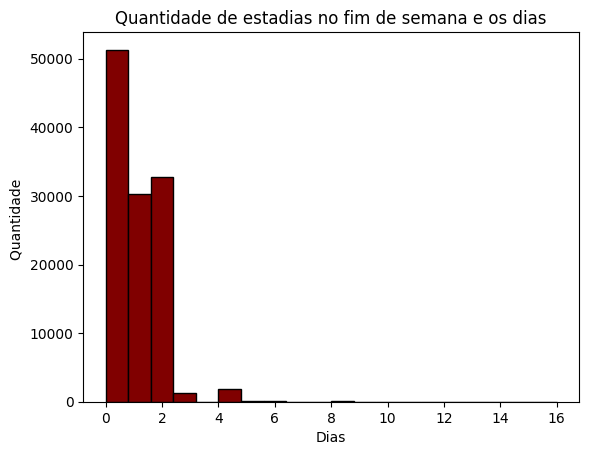

In [31]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.hist(data['stays_in_weekend_nights'],bins=20,color='#800000',edgecolor='black')
plt.xlabel('Dias')
plt.ylabel('Quantidade ')
plt.title('Quantidade de estadias no fim de semana e os dias')
plt.show()

### b) Agora, faça a mesma coisa para as estadias em dias da semana:

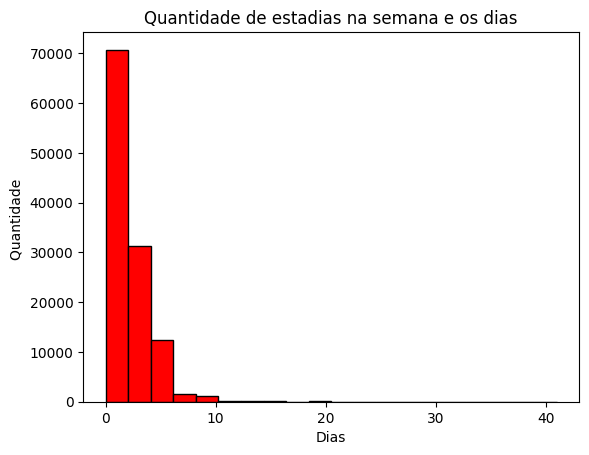

In [34]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.hist(data['stays_in_week_nights'],bins=20,color='red',edgecolor='black')
plt.xlabel('Dias')
plt.ylabel('Quantidade ')
plt.title('Quantidade de estadias na semana e os dias')
plt.show()

### c) Por fim, relacione o número de dias de estadia nos fins de semana e nos dias de semana, diferenciando-os pelo tipo de hotel (ou seja, city hotel ou resort hotel):

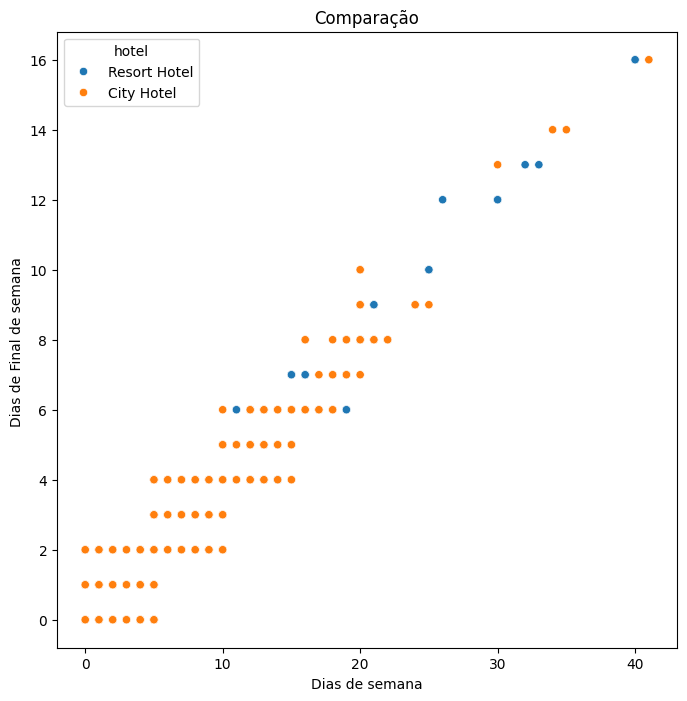

<class 'pandas.core.frame.DataFrame'>
Index: 117762 entries, 0 to 118897
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        117762 non-null  object 
 1   is_canceled                  117762 non-null  int64  
 2   lead_time                    117762 non-null  int64  
 3   arrival_date_year            117762 non-null  int64  
 4   arrival_date_month           117762 non-null  object 
 5   arrival_date_week_number     117762 non-null  int64  
 6   arrival_date_day_of_month    117762 non-null  int64  
 7   stays_in_weekend_nights      117762 non-null  int64  
 8   stays_in_week_nights         117762 non-null  int64  
 9   adults                       117762 non-null  int64  
 10  children                     117762 non-null  float64
 11  babies                       117762 non-null  int64  
 12  country                      117762 non-null  object 
 13  prev

hotel  is_canceled  lead_time  arrival_date_year  \
118893  City Hotel            0         23               2017   
118894  City Hotel            0        102               2017   
118895  City Hotel            0         34               2017   
118896  City Hotel            0        109               2017   
118897  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
118893             August                        35   
118894             August                        35   
118895             August                        35   
118896             August                        35   
118897             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
118893                         30                        2   
118894                         31                        2   
118895                         31                        2   
118896                         31                        2   
118897                         29                        2   

        stays_in_week_nights  adults  children  babies country  \
118893                     5       2       0.0       0     BEL   
118894                     5       3       0.0       0     FRA   
118895                     5       2       0.0       0     DEU   
118896                     5       2       0.0       0     GBR   
118897                     7       2       0.0       0     DEU   

        previous_cancellations  booking_changes  days_in_waiting_list     adr  \
118893                       0                0                     0   96.14   
118894                       0                0                     0  225.43   
118895                       0                0                     0  157.71   
118896                       0                0                     0  104.40   
118897                       0                0                     0  151.20   

        required_car_parking_spaces  total_of_special_requests  \
118893                            0                          0   
118894                            0                          2   
118895                            0                          4   
118896                            0                          0   
118897                            0                          2   

       reservation_status_date  
118893              2017-09-06  
118894              2017-09-07  
118895              2017-09-07  
118896              2017-09-07  
118897              2017-09-07

In [59]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.figure(figsize=(8,8))
sns.scatterplot(x=data['stays_in_week_nights'],y=data['stays_in_weekend_nights'],hue=data['hotel'])
plt.xlabel('Dias de semana')
plt.ylabel('Dias de Final de semana ')
plt.title('Comparação')
plt.xlim
plt.show()
data.info()
data.tail()

## Questão 4
data.head()

### a) Faça um gráfico que nos permita ver a evolução temporal das taxas médias diárias ao decorrer dos meses do ano
Dica: neste exercício, pode-se fazer útil o uso do parâmetro '*errorbar*' da biblioteca seaborn para refinar o seu gráfico

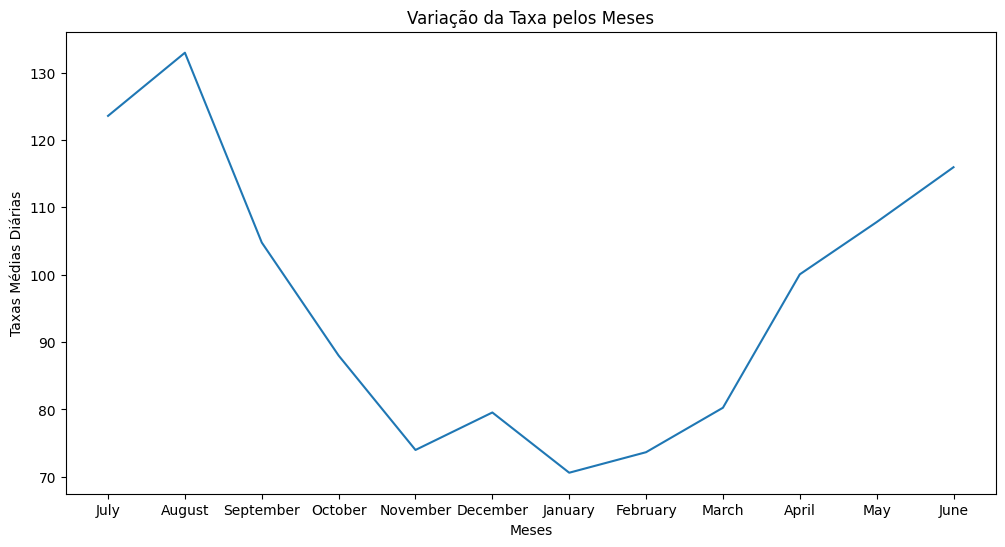

In [57]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.figure(figsize=(12,6))
sns.lineplot(x=data['arrival_date_month'],y=data['adr'],errorbar=None)
plt.xlabel('Meses')
plt.ylabel('Taxas Médias Diárias')
plt.title('Variação da Taxa pelos Meses')
plt.show()


### b) Faça um gráfico que nos permita ver a evolução temporal das taxas médias diárias ao decorrer dos anos

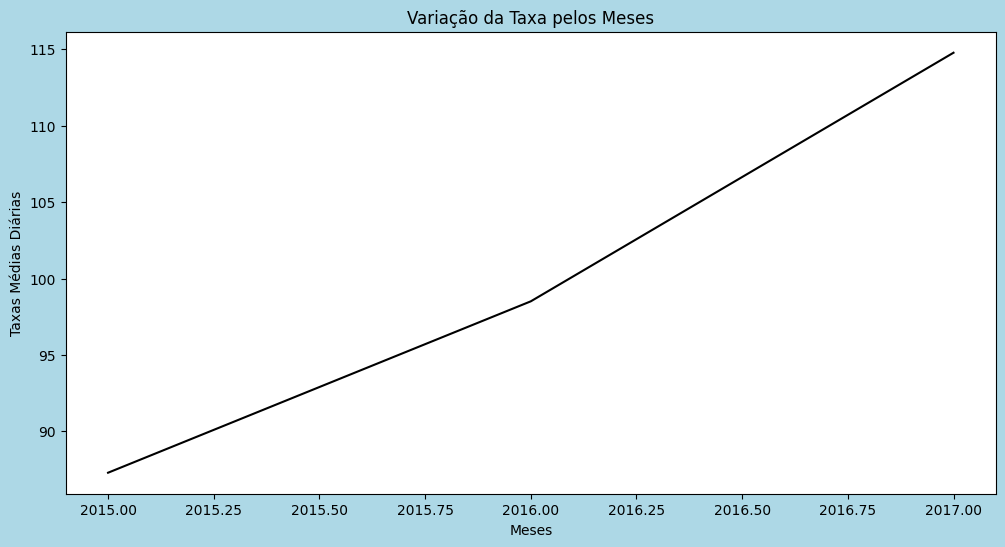

In [21]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.figure(figsize=(12,6))
sns.lineplot(x=data['arrival_date_year'],y=data['adr'],errorbar=None,color='black')
plt.xlabel('Meses')
plt.ylabel('Taxas Médias Diárias')
plt.title('Variação da Taxa pelos Meses')
fig = plt.gcf()
fig.patch.set_facecolor('lightblue')
plt.show()

## Questão 5

### Faça um gráfico que nos permita analisar a correlação entre todas as colunas numéricas ao mesmo tempo

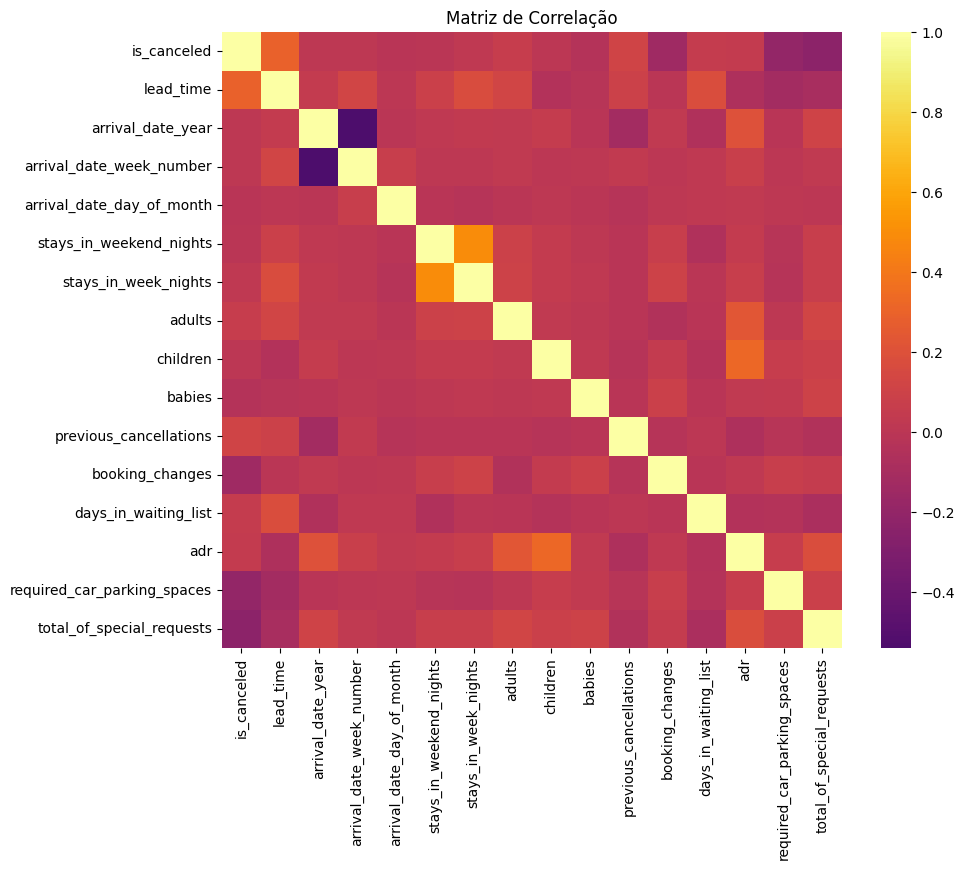

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        118898 non-null  object 
 1   is_canceled                  118898 non-null  int64  
 2   lead_time                    118898 non-null  int64  
 3   arrival_date_year            118898 non-null  int64  
 4   arrival_date_month           118898 non-null  object 
 5   arrival_date_week_number     118898 non-null  int64  
 6   arrival_date_day_of_month    118898 non-null  int64  
 7   stays_in_weekend_nights      118898 non-null  int64  
 8   stays_in_week_nights         118898 non-null  int64  
 9   adults                       118898 non-null  int64  
 10  children                     118898 non-null  float64
 11  babies                       118898 non-null  int64  
 12  country                      118898 non-null  object 
 13 

In [14]:
### SEU CÓDIGO COMEÇA AQUI ###
numeric_df = data.select_dtypes(include=[float, int])

# Calcula a matriz de correlação
correlation_matrix = numeric_df.corr()

# Cria o mapa de calor sem anotações
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='inferno', center=0)
plt.title('Matriz de Correlação')
plt.show()
data.info()

## Questão 6

### Faça um gráfico interativo e dinâmico da distribuição do número de dias entre a data da reserva e a da chegada, e do tipo de hotel

In [37]:
### SEU CÓDIGO COMEÇA AQUI ###
fig = px.box(data, x='lead_time', y='hotel',color='hotel')
fig.show()
